# 서울시 기온데이터 분석하기(feat. 모두의 데이터분석)

이번 차시에는 기상자료개방포털의 서울시 기온데이터를 가지고, 분석과 시각화 등을 실습해보겠습니다.

## csv파일 다운로드하기

## ① [기후통계분석] - [기온분석] 클릭

(https://data.kma.go.kr를 통해 기상자료개방포털 접속)

![](https://imgdb.in/k0UQ.jpg)

![](https://imgdb.in/k0UR.jpg)

---

## ② 기간선택(19040101~) 후 [검색] 버튼 클릭 후 [CSV] 클릭

![](https://imgdb.in/k0US.jpg)

---

## ③ 다운로드 완료되면 엑셀로 해당파일 열어보기

![](https://imgdb.in/k0UV.png)

![](https://imgdb.in/k0UW.jpg)

---

## ④ 데이터 확인 결과

### 1_ 1행부터 7행까지 헤더정보

![](https://imgdb.in/k0UX.jpg)

### 2_ 여러 개의 결측치를 가지고 있는 것을 확인

![](https://imgdb.in/k0UY.jpg)

---





엑셀로 열어본 결과,
1~7행까지는 헤더정보가 들어 있는 것을 확인할 수 있었고,
결측치가 여러 개 있는 것도 확인할 수 있었습니다.
그럼 파이썬으로 csv파일을 불러와보겠습니다.
헤더정보 7개 행 때문에 기존에 배웠던 pd.read_csv로는 그냥 불러와지지 않습니다.


In [191]:

import pandas as pd

df = pd.read_csv("seoul.csv", encoding="cp949")
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 5


위의 문제를 해결하기 위한 대표적인 방법으로
1_ csv파일의 8번 행까지 지운 새로운 csv파일을 pd로 불러오는 방법
2_ csv파일의 모든 문자열을 open함수로 불러온 후에 9행부터 pd로 불러오는 방법

첫 번째 방법은 엑셀을 통해서 편집한 후 저장하는 방법이 가장 간단할 것 같습니다.
만약 엑셀이 설치되어 있지 않다면 아래 방법으로도 가능합니다.

# 첫 번째 방법(open 함수 활용)

In [199]:
# 기존 csv파일 내용 일부(여덟번째 행부터)를 메모리에 담기
with open('seoul.csv') as file:
    lines = [line for line_number, line in enumerate(file, start=1) if line_number >= 8]
    # lines = [line for line_number, line in enumerate(file) if line_number >= 7]  # 인덱스는 0부터이므로

# 메모리에 담은 데이터만 새로 저장하기
with open('seoul_new.csv', 'w') as file:
    file.writelines(lines)

df = pd.read_csv("seoul_new.csv", encoding="cp949")  # 새로 저장한 csv파일을 df로 불러오기
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
41443,2022-05-24,108,22.9,16.7,30.2
41444,2022-05-25,108,21.0,16.7,26.7
41445,2022-05-26,108,18.7,14.1,23.5
41446,2022-05-27,108,20.0,16.0,25.6


위 방법이 너무 복잡하게 느껴지신다면, 보다 간편한 아래 방법으로 시도하셔도 무방합니다.

# 두 번째 방법(리스트 인덱싱 활용)

In [200]:
import csv

with open("seoul.csv", encoding="cp949") as f:
    data = list(csv.reader(f))

data[7:15]

[['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'],
 ['1907-10-01', '108', '13.5', '7.9', '20.7'],
 ['1907-10-02', '108', '16.2', '7.9', '22'],
 ['1907-10-03', '108', '16.2', '13.1', '21.3'],
 ['1907-10-04', '108', '16.5', '11.2', '22'],
 ['1907-10-05', '108', '17.6', '10.9', '25.4'],
 ['1907-10-06', '108', '13', '11.2', '21.3'],
 ['1907-10-07', '108', '11.3', '6.3', '16.1']]

# 리스트 데이터를 데이터프레임으로 변환하기

In [201]:
# df = pd.DataFrame(data[8:], columns=data[7])  # 이렇게 입력하면 특수기호(℃) 때문에 df 가공시 불편함
# ..., columns=["날짜", "지점", "평균기온", "최저기온", "최고기온"])  # 이렇게 하면 쉽지만 일일이 타이핑하기 번거로움
df = pd.DataFrame(data[8:], columns=[i.replace("(℃)", "") for i in data[7]])  # 파이썬 문법에 익숙해지면 이렇게~

df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22
4,1907-10-05,108,17.6,10.9,25.4


위 두 가지 방법이 특별히 장단점이 있는 건 아니지만,
파이썬 문법에 익숙해지시면 **첫 번째 방법**을 추천드립니다.
두 번째 방법은 csv파일의 용량이 (어마어마하게) 큰 경우에는 유의하셔야 합니다.
내용 전체를 메모리에 한꺼번에 담아야 하므로 오류가 나거나, 느릴 수 있기 때문입니다.

# 대표적인 기술통계값을 describe로 알아보겠습니다.

In [202]:
df.describe()

,날짜,지점,평균기온,최저기온,최고기온
count,41448,41448,41448,41448,41448
unique,41448,1,490,506,514
top,1907-10-01,108,,,
freq,1,41448,756,758,759


조금 이상하지 않나요?
우리가 예상하기로는 평균과 표준편차, 사분위수 이런 숫자들이 나올 줄 알았는데?
이건 아래의 출력결과 한 줄을 보시면 쉽게 짐작하실 수 있습니다.

In [203]:
data[7:9]

[['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'],
 ['1907-10-01', '108', '13.5', '7.9', '20.7']]

출력된 두 번째 라인만 보면!!
date, int, float 자료형이어야 하는 값들이 전부 str(문자열)이네요.
(전부 따옴표로 둘러싸여 있는 것 보이시죠?)
그래서 하나씩 원하는 자료형으로 변환을 해 줘야 합니다.

# 자료형 변환하기

In [204]:
df = df.astype({'날짜': 'datetime64[ns]',
                '지점': float,
                '평균기온(℃)': float,
                '최저기온(℃)': float,
                '최고기온(℃)': float})
df.head()

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

결측치('')가 있어 바로 변환이 안 되고 ValueError를 뱉네요.
결측치가 있는 행을 지울지, -999 등 특정 값으로 채울지, 내삽기법을 적용할지 고민하기 전에
먼저 결측치가 얼마나 있는지 한 번 확인해봅시다.

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41449 entries, 0 to 41448
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      41448 non-null  object
 1   지점      41448 non-null  object
 2   평균기온    41448 non-null  object
 3   최저기온    41448 non-null  object
 4   최고기온    41448 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


결측치로 조사되는 게 아니고, 빈 문자열("")로 채워져 있다고 인식을 하는군요?

# 평균기온에 빈 문자열("")이 들어가 있는 행만 출력해보기

In [206]:
df[df["평균기온"] == ""]

,날짜,지점,평균기온,최저기온,최고기온
15676,1950-09-01,108,,,
15677,1950-09-02,108,,,
15678,1950-09-03,108,,,
15679,1950-09-04,108,,,
15680,1950-09-05,108,,,
...,...,...,...,...,...
16427,1953-11-26,108,,,
16428,1953-11-27,108,,,
16429,1953-11-28,108,,,
16430,1953-11-29,108,,,


756개 행의 데이터에 기온값이 모두 빠져 있군요?
(6.25 전쟁 때문에 데이터 측정이 불가했던 상황으로 추정)
41449개의 행 중에 756개면 대략 2% 정도 되는 수치인데
일반적으로 결측치가 한 부분에 너무 많이 몰려 있으면, 행을 지우는 게 무리인데,
우리 데이터 같은 경우는 1950년대가 워낙 옛날이기도 해서
1953년 이전의 기온데이터를 싹 날려버려도 크게 분석결과에 영향을 줄 것 같지는 않습니다.
여러분 생각은 어떠신가요?

우선, 빈 문자열 값을 np.NaN으로 바꿔줍니다.

# 빈 문자열 값을 전부 NaN(Not a Number) 값으로 변환하기

In [207]:
import numpy as np

df = df.replace("", np.NAN)

# 날짜는 datetime자료형으로, 나머지 문자열 자료형은 "실수"로 변환하기

In [208]:
df = df.astype({'날짜': 'datetime64[ns]',
                '지점': float,
                '평균기온': float,
                '최저기온': float,
                '최고기온': float})
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108.0,13.5,7.9,20.7
1,1907-10-02,108.0,16.2,7.9,22.0
2,1907-10-03,108.0,16.2,13.1,21.3
3,1907-10-04,108.0,16.5,11.2,22.0
4,1907-10-05,108.0,17.6,10.9,25.4


# 결측값(NaN)을 결측값 이전 행의 값(pad)으로 일괄 채우기
앞의 값으로 채우려면 "pad", 뒤의 값으로 채우려면 "bfill"

In [209]:
df = df.fillna(method="pad")
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108.0,13.5,7.9,20.7
1,1907-10-02,108.0,16.2,7.9,22.0
2,1907-10-03,108.0,16.2,13.1,21.3
3,1907-10-04,108.0,16.5,11.2,22.0
4,1907-10-05,108.0,17.6,10.9,25.4


긴 과정을 거쳐, 문자열 자료형을 실수로 변환했습니다.
다시 describe를 실행해봅시다.

In [210]:
df.describe()

,지점,평균기온,최저기온,최고기온
count,41449.0,41449.000000,41449.000000,41449.000000
mean,108.0,11.993131,7.680979,17.038020
std,0.0,10.712788,10.910880,11.077153
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.900000,-1.200000,7.400000
50%,108.0,13.300000,8.400000,19.000000
75%,108.0,21.500000,17.500000,26.600000
max,108.0,33.700000,30.300000,39.600000


# 간단히 시각화해보기

<AxesSubplot:>

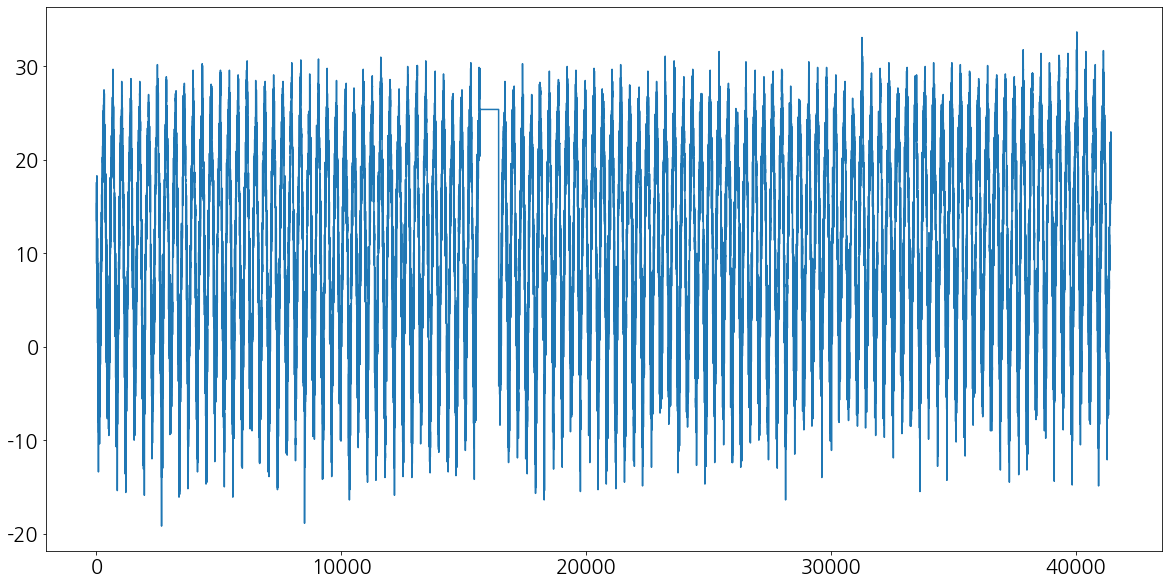

In [211]:
df.iloc[:, 2].plot.line(figsize=(20, 10))  # 평균기온

위의 그래프를 직관적으로 보면, 사람에 따라, 관점에 따라 여러 가지가 보입니다. 예를 들면,
최근들어 기온 상승세가 시작된 것 같다든지, 변동이 커진 것 같다든지,
정확하지는 않지만 대략의 느낌으로 볼 때 여러 가지 가설을 세워볼 수 있을 것 같습니다.
나중에 보다 정확한 통계 기법을 적용해서 여러가지 가설을 세우고 검증해 보면 좋겠네요.
무엇보다 저 그래프는 "일별"이라서 위아래 진폭이 너무 심하네요. 읽기도 어렵고요.
연도별 최고기온의 평균을 집계해서 그래프를 다시 그려볼까요?

In [212]:
df["연도"] = df["날짜"].apply(lambda x: x.year)
# df["연도"] = df["날짜"].str.split("-")[0]  # 문자열이었다면!

df.head()  # 오른쪽 끝에 "연도"칼럼이 추가되었습니다. 이걸 기준으로 그룹화해보시죠.

,날짜,지점,평균기온,최저기온,최고기온,연도
0,1907-10-01,108.0,13.5,7.9,20.7,1907
1,1907-10-02,108.0,16.2,7.9,22.0,1907
2,1907-10-03,108.0,16.2,13.1,21.3,1907
3,1907-10-04,108.0,16.5,11.2,22.0,1907
4,1907-10-05,108.0,17.6,10.9,25.4,1907


In [213]:
df_year = df.groupby(by="연도").mean()
df_year.tail()

,지점,평균기온,최저기온,최고기온
연도,,,,
2018,108.0,13.002466,8.871233,17.956986
2019,108.0,13.598904,9.321096,18.602192
2020,108.0,13.271858,9.389617,17.867213
2021,108.0,13.752055,9.622466,18.491781
2022,108.0,7.589262,3.024161,12.915436


# 2022년 여름은 아직...

2022년은 아직 뜨거운 여름이 안 와서, 최고기온 평균이 평년 대비 굉장히 낮네요.
먼저 플로팅을 해보시죠.

<AxesSubplot:xlabel='연도'>

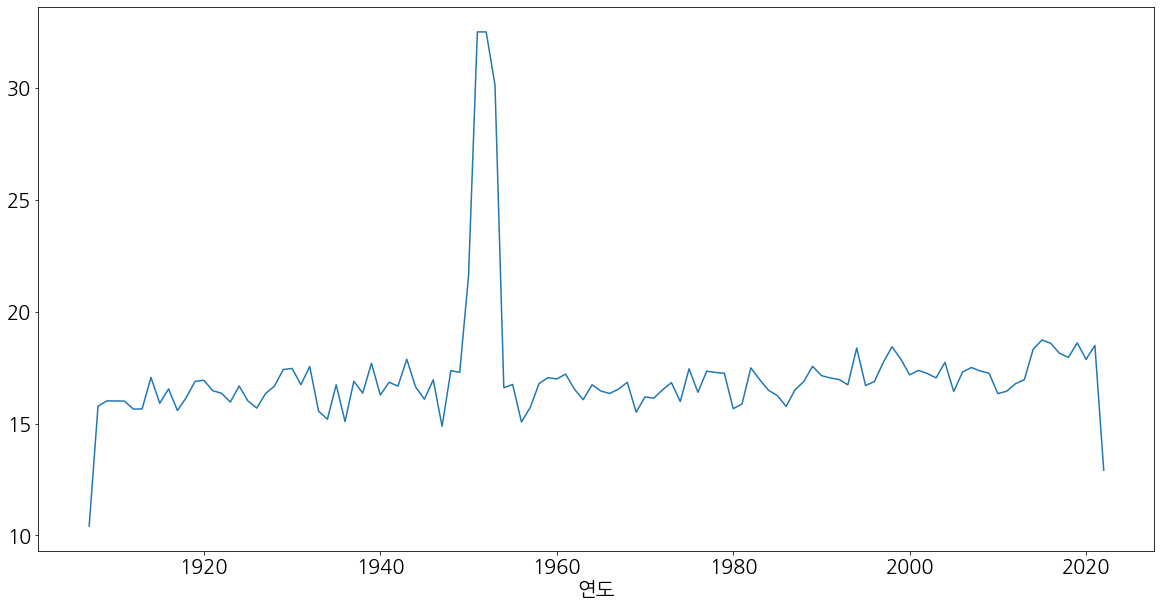

In [214]:
df_year["최고기온"].plot.line(figsize=(20, 10))

# 데이터 중에 튀는 값이 있네요?

왜 튀는지 이유를 한 번 생각해봅시다.
1_ 시작부분 쑥 내려간 부분,
2_ 중간에 30도가 넘는 부분,
3_ 2022년에 다시 쑥 내려간 부분 세 개가 조금 이상해 보입니다.

# describe로 df_year의 기술통계값 확인해보기

In [215]:
df_year.describe()

,지점,평균기온,최저기온,최고기온
count,116.0,116.000000,116.000000,116.000000
mean,108.0,12.047503,7.720534,17.114529
std,0.0,2.434627,2.470644,2.654329
min,108.0,5.103261,0.067391,10.416304
25%,108.0,10.972397,6.314652,16.236164
50%,108.0,11.711644,7.517397,16.761673
75%,108.0,12.529658,8.630389,17.342433
max,108.0,25.400000,20.100000,32.500000


# 이상치 찾아보기 : 1950년대 부근 최대값

In [216]:
df_year[df_year["최고기온"] >= 30]

,지점,평균기온,최저기온,최고기온
연도,,,,
1951,108.0,25.40000,20.100000,32.500000
1952,108.0,25.40000,20.100000,32.500000
1953,108.0,23.29726,18.098904,30.126301


세 개 년도가 pad 채우기로 인해 특이한 평균값이 나와버렸네요.
(조금 더 고민해보면 좋은 해법이 있겠지만 당장은)
오염된 값을 제거한 후,
1954년부터 2021년까지의 데이터만 가지고 집계를 해봅시다.

In [217]:
df_year = df_year.loc[1954:2021]
df_year.head()

,지점,평균기온,최저기온,최고기온
연도,,,,
1954,108.0,11.487945,7.181644,16.598082
1955,108.0,11.512877,7.116164,16.744658
1956,108.0,10.113388,5.842623,15.067213
1957,108.0,10.516438,6.226849,15.723836
1958,108.0,11.637260,7.394247,16.790137


<AxesSubplot:xlabel='연도'>

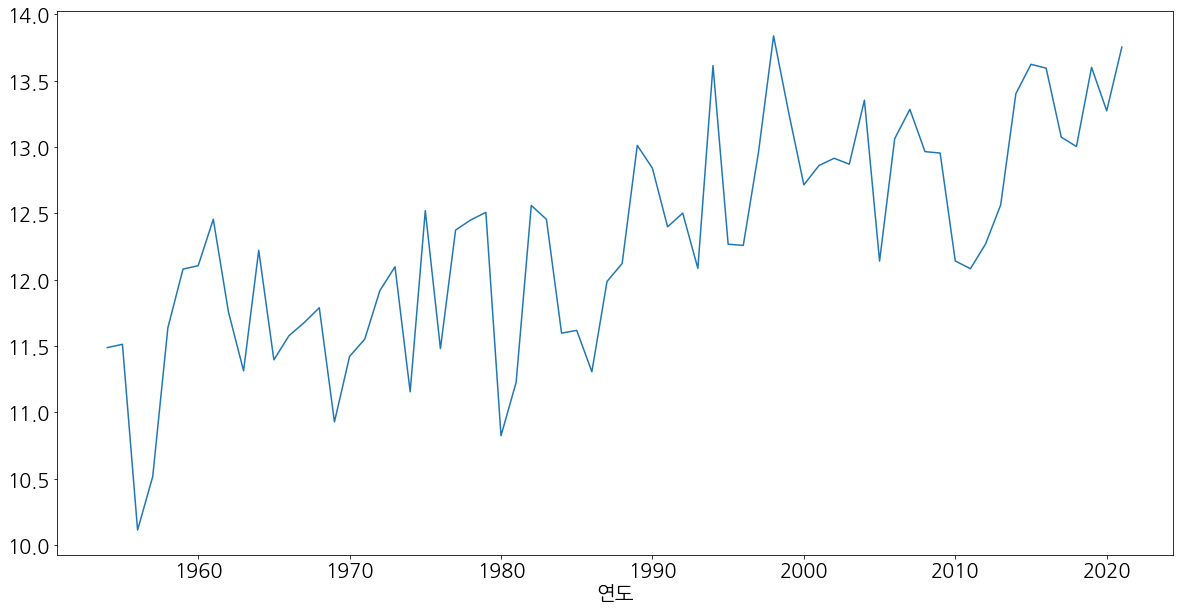

In [218]:
df_year.loc[:, "평균기온"].plot.line(figsize=(20, 10))

(서울시 특정 점의 기온에 국한한 내용이기는 하지만)
뚜렷하게 저점과 고점이 동시에 꾸준히 상승하고 있는 것을 확인할 수 있습니다.

<AxesSubplot:xlabel='연도', ylabel='평균기온'>

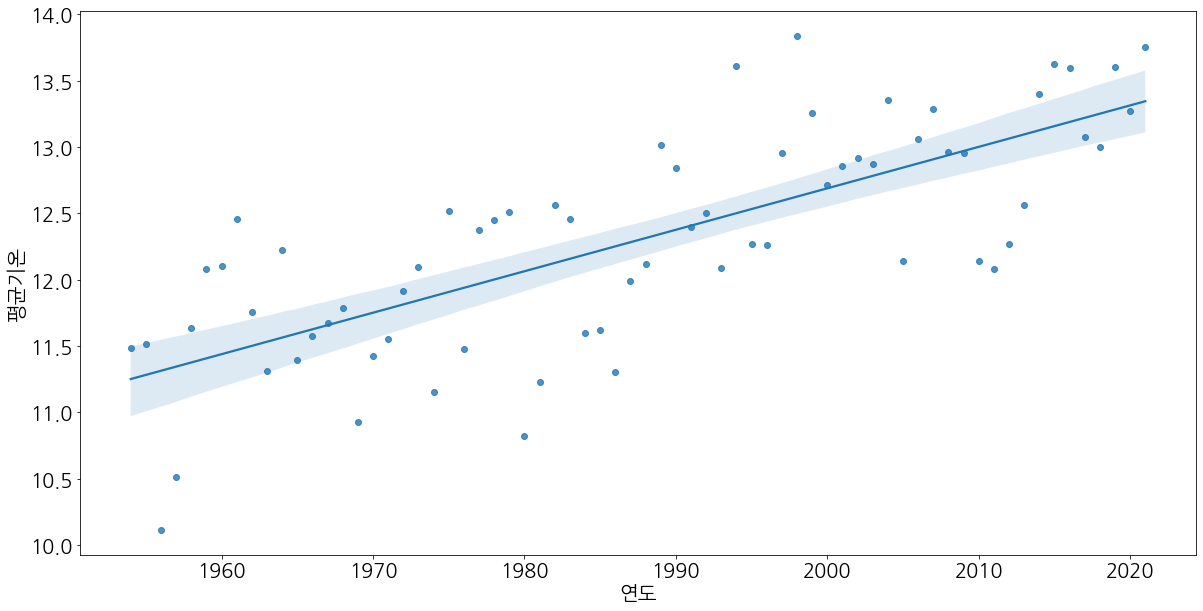

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':20})
sns.regplot(x=df_year.index, y='평균기온', data=df_year, fit_reg=True)

전지구적 기온상승이 사실 어제오늘 듣는 생소한 이야기는 아니지만
이렇게 간단히 시각화를 해보니,더 뚜렷하게 상승추세가 와닿는 느낌입니다.

마지막으로 복습 겸 몇 가지 간단한 질문에 답을 구해봅시다.

# 1. 서울의 기온이 가장 높았던 날의 날짜와 기온 구하기

In [220]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,연도
0,1907-10-01,108.0,13.5,7.9,20.7,1907
1,1907-10-02,108.0,16.2,7.9,22.0,1907
2,1907-10-03,108.0,16.2,13.1,21.3,1907
3,1907-10-04,108.0,16.5,11.2,22.0,1907
4,1907-10-05,108.0,17.6,10.9,25.4,1907


In [221]:
df["max_rank"] = df["최고기온"].rank(method="max", ascending=False)
df.head()

,날짜,지점,평균기온,최저기온,최고기온,연도,max_rank
0,1907-10-01,108.0,13.5,7.9,20.7,1907,18852.0
1,1907-10-02,108.0,16.2,7.9,22.0,1907,17288.0
2,1907-10-03,108.0,16.2,13.1,21.3,1907,18167.0
3,1907-10-04,108.0,16.5,11.2,22.0,1907,17288.0
4,1907-10-05,108.0,17.6,10.9,25.4,1907,12432.0


In [222]:
df[df["max_rank"] == 1][["날짜", "평균기온", "최저기온", "최고기온"]]

,날짜,평균기온,최저기온,최고기온
40051,2018-08-01,33.6,27.8,39.6


2018년 8월의 폭염은 비단 우리나라 뿐만 아니라 전 세계에 경종을 울려주었죠.

# 관련뉴스

## 2018년 폭염 사망자 48명 아닌 160명(한겨레)
https://h21.hani.co.kr/arti/special/special_general/47876.html

## 나무위키, "2018년 폭염"
https://namu.wiki/w/2018%EB%85%84%20%ED%8F%AD%EC%97%BC

# 2. 내 생일의 기온변화를 그래프로 그리기

In [223]:
df["month"] = df["날짜"].apply(lambda x: x.month)
df["day"] = df["날짜"].apply(lambda x: x.day)
df.head()

,날짜,지점,평균기온,최저기온,최고기온,연도,max_rank,month,day
0,1907-10-01,108.0,13.5,7.9,20.7,1907,18852.0,10,1
1,1907-10-02,108.0,16.2,7.9,22.0,1907,17288.0,10,2
2,1907-10-03,108.0,16.2,13.1,21.3,1907,18167.0,10,3
3,1907-10-04,108.0,16.5,11.2,22.0,1907,17288.0,10,4
4,1907-10-05,108.0,17.6,10.9,25.4,1907,12432.0,10,5


In [224]:
df_myb = df[(df.month==2) & (df.day==26)]
df_myb.head()

,날짜,지점,평균기온,최저기온,최고기온,연도,max_rank,month,day
148,1908-02-26,108.0,-2.3,-7.9,4.1,1908,34635.0,2,26
514,1909-02-26,108.0,-3.2,-8.2,0.7,1909,37856.0,2,26
879,1910-02-26,108.0,1.2,-3.4,5.4,1910,33258.0,2,26
1244,1911-02-26,108.0,1.6,-2.3,7.0,1911,31589.0,2,26
1609,1912-02-26,108.0,9.6,5.9,14.7,1912,24667.0,2,26


<AxesSubplot:xlabel='연도'>

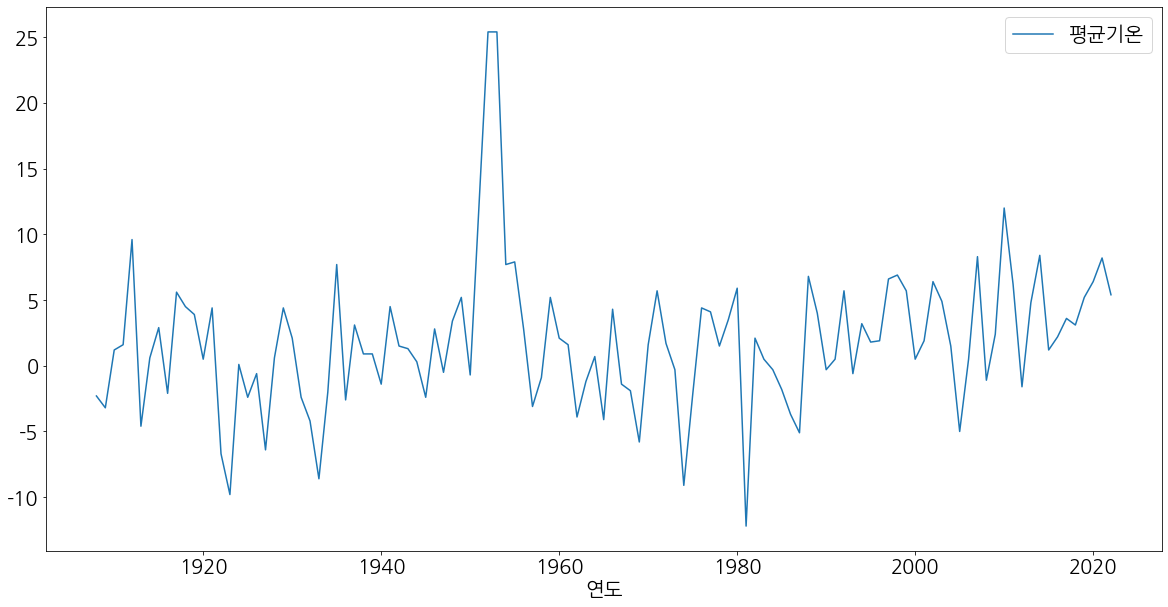

In [225]:
df_myb.plot.line(x="연도", y="평균기온", figsize=(20,10))

# 1년 중 평균 일교차가 가장 큰 달은 몇월일까?

같이 작성해봅시다.